<a href="https://colab.research.google.com/github/hritic/Machine-learning/blob/main/Non_Linear(Polynomial)_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Perform the following operations:

1. Plot the voltage vs current. 
2. Split the data into training & testing. It should be a 80:20 split. Obtain polynomial features for training and testing dataset with degree 3. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semiconductor_data.csv')


In [ ]:
df.head()

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


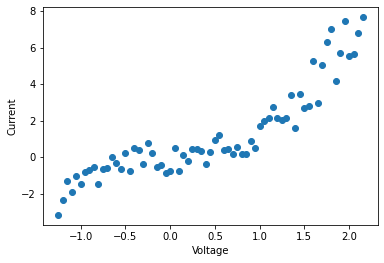

In [ ]:
plt.scatter(df.voltage, df.current)
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
x_train, x_test, y_train, y_test = train_test_split(df.current, df.voltage, test_size=0.20, random_state=42)

In [ ]:
train

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983
5,-1.00,-1.468562
6,-0.95,-0.836266
7,-0.90,-0.706068
8,-0.85,-0.565333
9,-0.80,-1.488503


In [ ]:
train_x = np.asanyarray(train[['voltage']])
train_y = np.asanyarray(train[['current']])

test_x = np.asanyarray(test[['voltage']])
test_y = np.asanyarray(test[['current']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.000000e+00, -1.250000e+00,  1.562500e+00, -1.953125e+00],
       [ 1.000000e+00, -1.200000e+00,  1.440000e+00, -1.728000e+00],
       [ 1.000000e+00, -1.150000e+00,  1.322500e+00, -1.520875e+00],
       [ 1.000000e+00, -1.100000e+00,  1.210000e+00, -1.331000e+00],
       [ 1.000000e+00, -1.050000e+00,  1.102500e+00, -1.157625e+00],
       [ 1.000000e+00, -1.000000e+00,  1.000000e+00, -1.000000e+00],
       [ 1.000000e+00, -9.500000e-01,  9.025000e-01, -8.573750e-01],
       [ 1.000000e+00, -9.000000e-01,  8.100000e-01, -7.290000e-01],
       [ 1.000000e+00, -8.500000e-01,  7.225000e-01, -6.141250e-01],
       [ 1.000000e+00, -8.000000e-01,  6.400000e-01, -5.120000e-01],
       [ 1.000000e+00, -7.500000e-01,  5.625000e-01, -4.218750e-01],
       [ 1.000000e+00, -6.500000e-01,  4.225000e-01, -2.746250e-01],
       [ 1.000000e+00, -6.000000e-01,  3.600000e-01, -2.160000e-01],
       [ 1.000000e+00, -5.500000e-01,  3.025000e-01, -1.663750e-01],
       [ 1.000000e+00, -5.000000e-

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.         0.67842698 0.03265102 0.6607536 ]]
Intercept:  [-0.00090734]


Text(0, 0.5, 'Current')

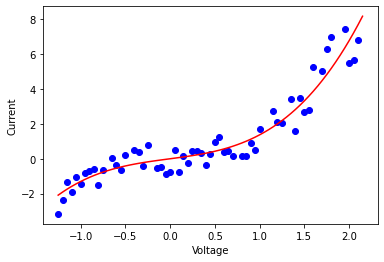

In [ ]:
plt.scatter(train.voltage, train.current,  color='blue')
XX = df.voltage
# print(XX)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX,2) + regr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Voltage")
plt.ylabel("Current")

In [ ]:
test_x_poly = poly.fit_transform(test_x)
y_test_hat = regr.predict(test_x_poly)

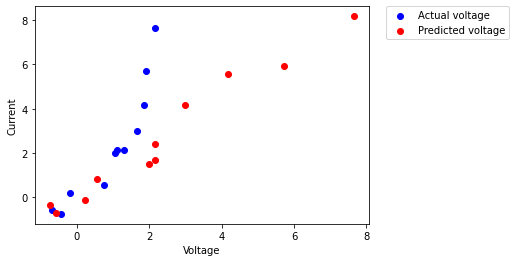

In [ ]:
plt.scatter(test_x, test_y, color='blue', label="Actual voltage")
plt.scatter(test_y, y_test_hat, color='red', label="Predicted voltage")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad = 0)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_test_hat , test_y) )

Mean absolute error: 0.51
Residual sum of squares (MSE): 0.40
R2-score: 0.95
